In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install xgboost-gpu


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# !pip install --upgrade xgboost

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset1/optuna_study3.db


In [42]:
import shutil
import os

# Tentukan path file sumber di /kaggle/input/
# Ganti 'nama-dataset-anda' dan 'nama_file.csv' sesuai dengan milik Anda
source_file_path = '/kaggle/input/dataset1/optuna_study3.db'

# Tentukan nama file tujuan di /kaggle/working/
# Anda bisa menggunakan nama yang sama atau nama baru
destination_file_name = 'optuna_study3.db'
destination_file_path = os.path.join('/kaggle/working/', destination_file_name)

# Salin file
try:
    shutil.copy(source_file_path, destination_file_path)
    print(f"File '{source_file_path}' berhasil disalin ke '{destination_file_path}'")

    # Sekarang Anda bisa memodifikasi file di destination_file_path
    # Contoh: membaca dan menulisnya dengan pandas
    # import pandas as pd
    # df = pd.read_csv(destination_file_path)
    # df['kolom_baru'] = 'nilai baru'
    # df.to_csv(destination_file_path, index=False)
    # print("File di /kaggle/working/ telah dimodifikasi.")

except FileNotFoundError:
    print(f"Error: File sumber tidak ditemukan di '{source_file_path}'")
except Exception as e:
    print(f"Terjadi error saat menyalin file: {e}")

File '/kaggle/input/dataset1/optuna_study3.db' berhasil disalin ke '/kaggle/working/optuna_study3.db'


In [43]:
data = 'https://raw.githubusercontent.com/Dimassaputra5/DataQuest/refs/heads/main/training_dataset.csv'
data_validation = 'https://raw.githubusercontent.com/Dimassaputra5/DataQuest/refs/heads/main/validation_set.csv'
cc = pd.read_csv(data, 
                 encoding='utf-8',
                 sep=',')
cc_validation = pd.read_csv(data_validation, 
                 encoding='utf-8',
                 sep=',')
cc

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,680377,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,505429,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0
22913,308952,29,manajer,lajang,SMA,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,NTT,0
22914,865813,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,NTB,0


In [44]:
cc_validation

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NTB
5727,612330,60,teknisi,menikah,Diploma,unknown,no,no,telephone,jul,...,15,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,Papua


In [45]:
cc.info()
cc_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

# EDA

In [46]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print(cc.describe())
print(cc.describe(include='object'))
print(cc.isnull().sum())
print(cc.duplicated().sum())

       customer_number          usia  jumlah_kontak_kampanye_ini  \
count     22916.000000  22916.000000                22916.000000   
mean     550930.993193     40.016233                    2.561878   
std      259909.889175     10.438059                    2.794178   
min      100108.000000     17.000000                    1.000000   
25%      325755.000000     32.000000                    1.000000   
50%      553139.000000     38.000000                    2.000000   
75%      777157.500000     47.000000                    3.000000   
max      999997.000000     98.000000                   42.000000   

       hari_sejak_kontak_sebelumnya  jumlah_kontak_sebelumnya  \
count                  22916.000000              22916.000000   
mean                     962.210377                  0.170143   
std                      187.566774                  0.490611   
min                        0.000000                  0.000000   
25%                      999.000000                  0.000000 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


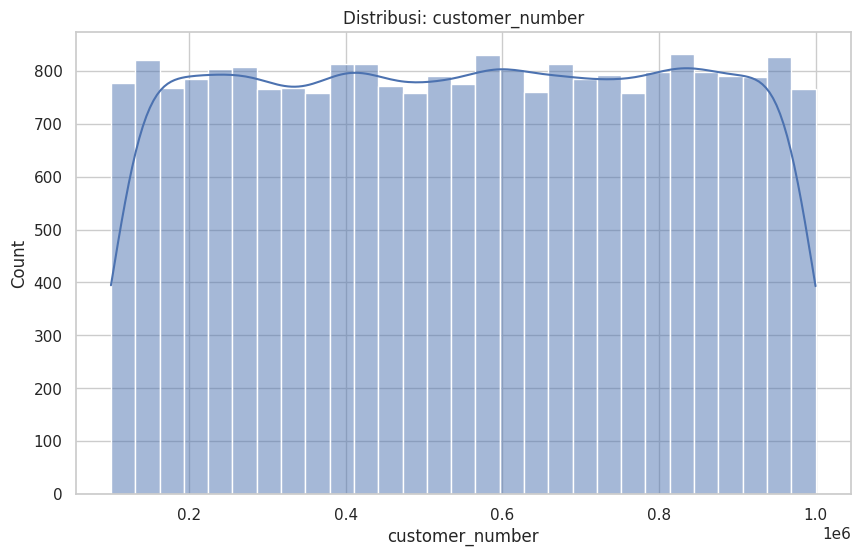

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


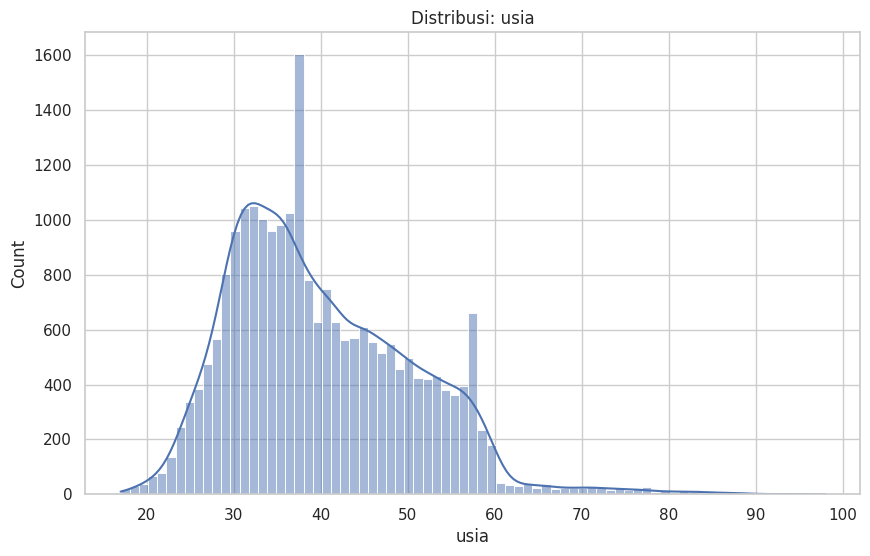

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


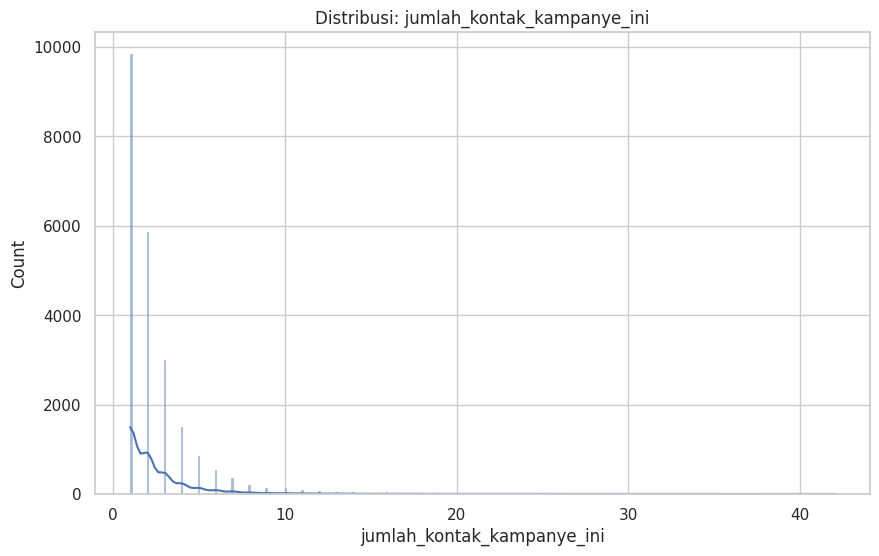

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


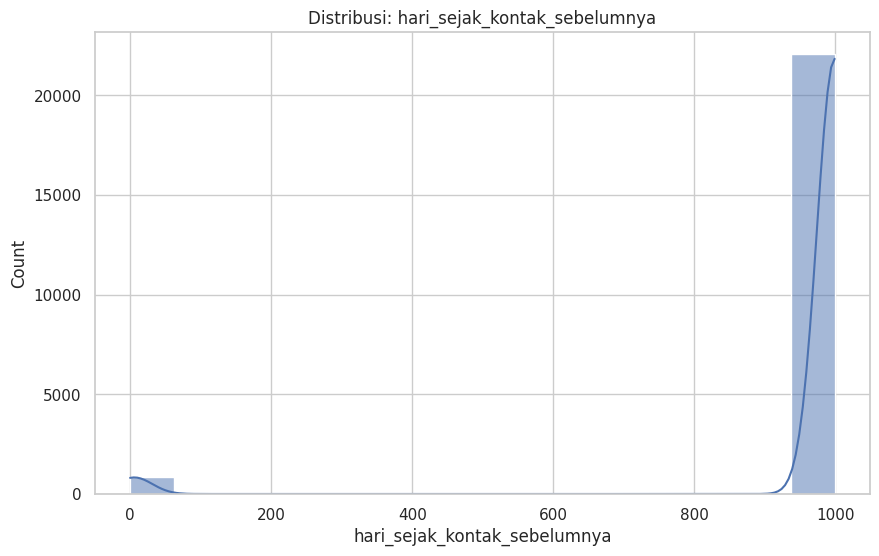

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


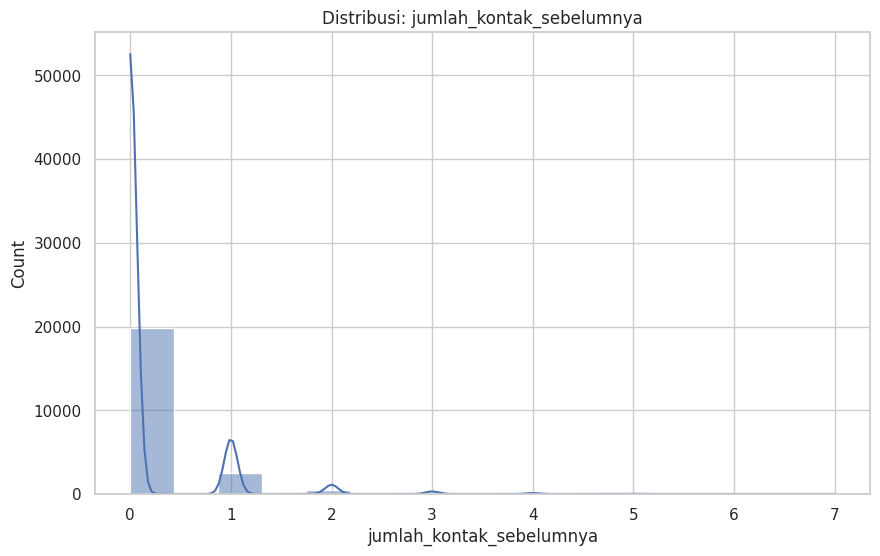

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


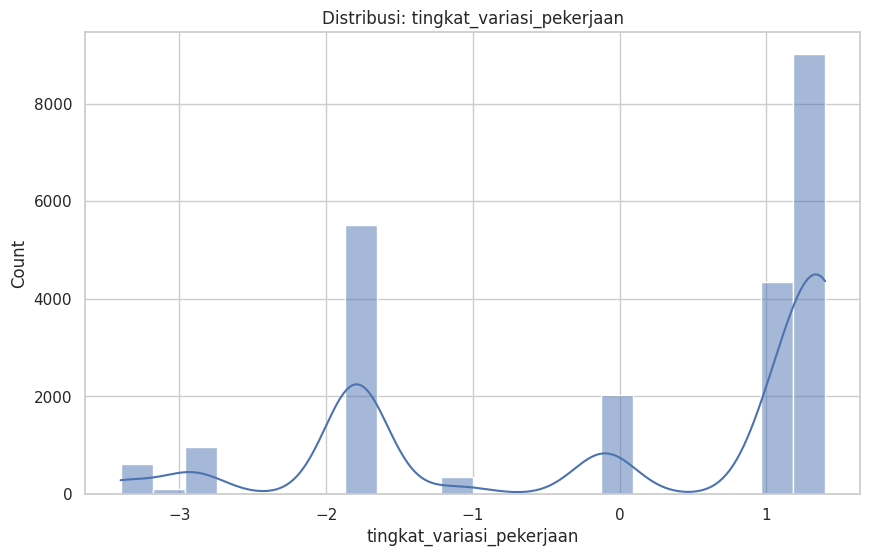

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


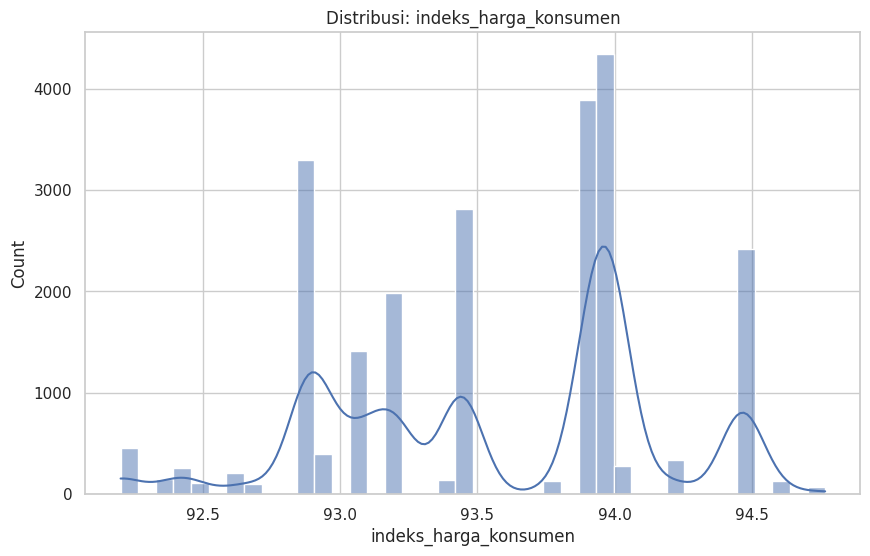

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


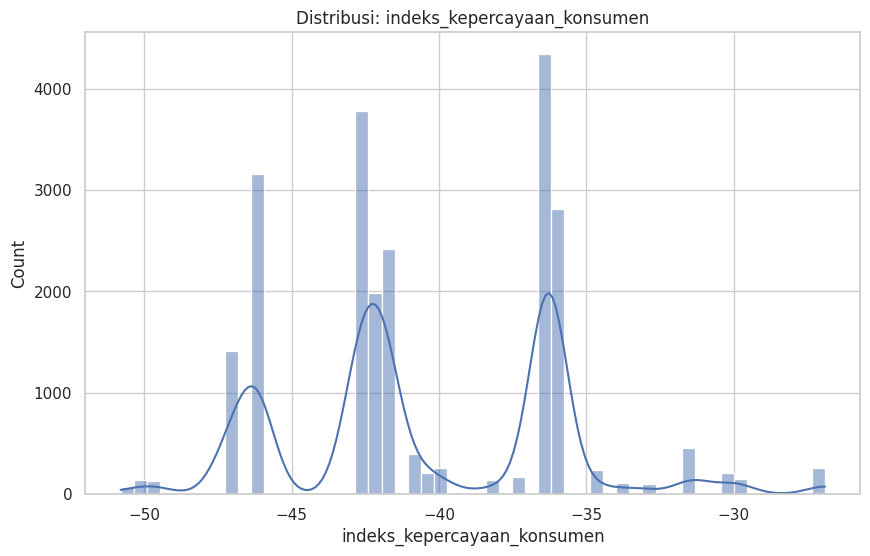

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


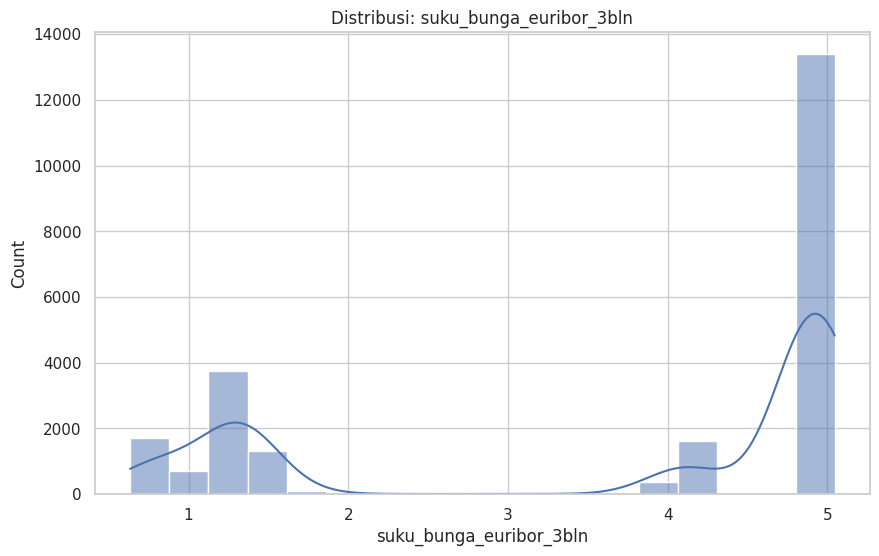

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


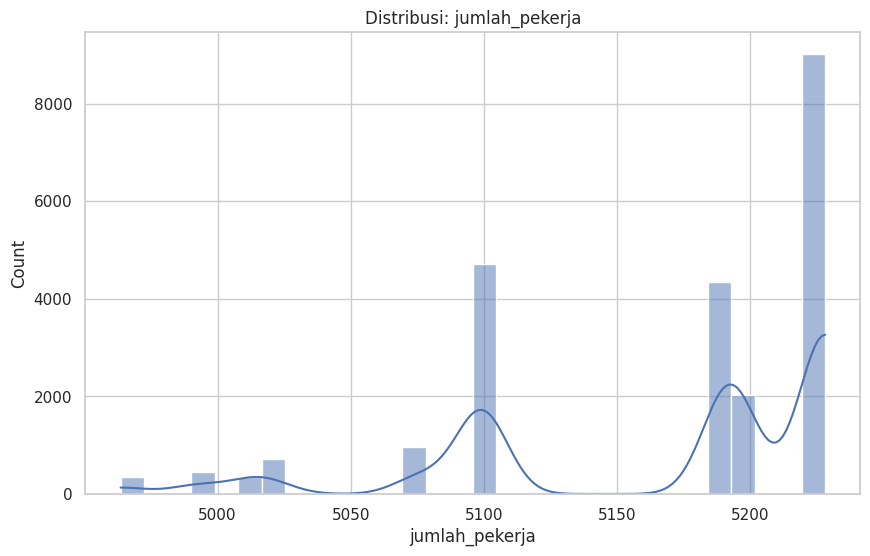

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


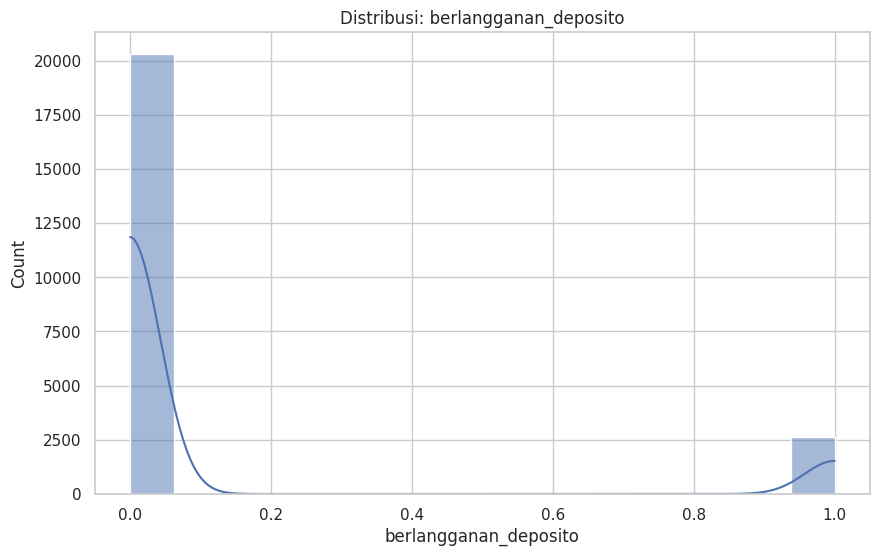

In [47]:
num_cols = cc.select_dtypes(include=np.number).columns
for col in num_cols:
    sns.histplot(cc[col], kde=True)
    plt.title(f'Distribusi: {col}')
    plt.show()

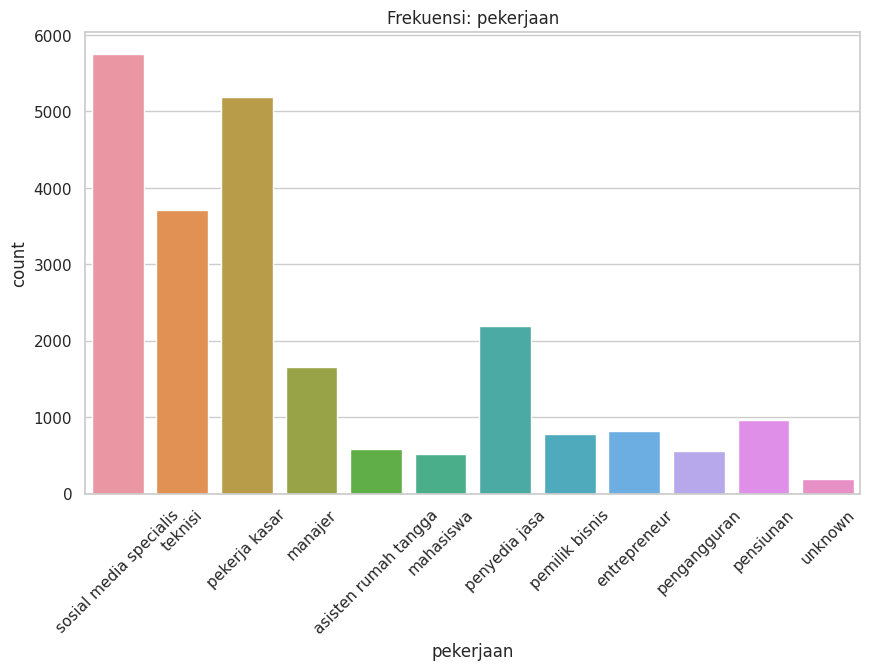

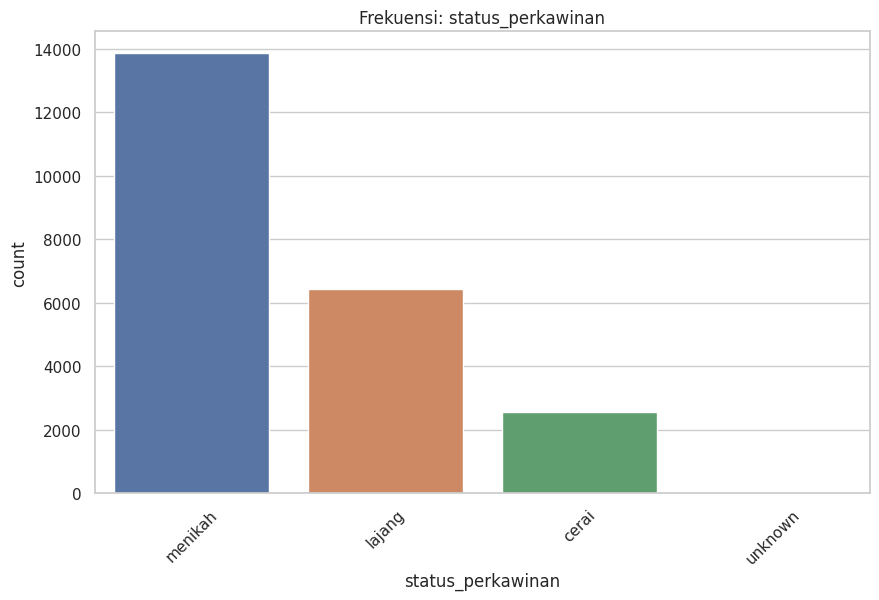

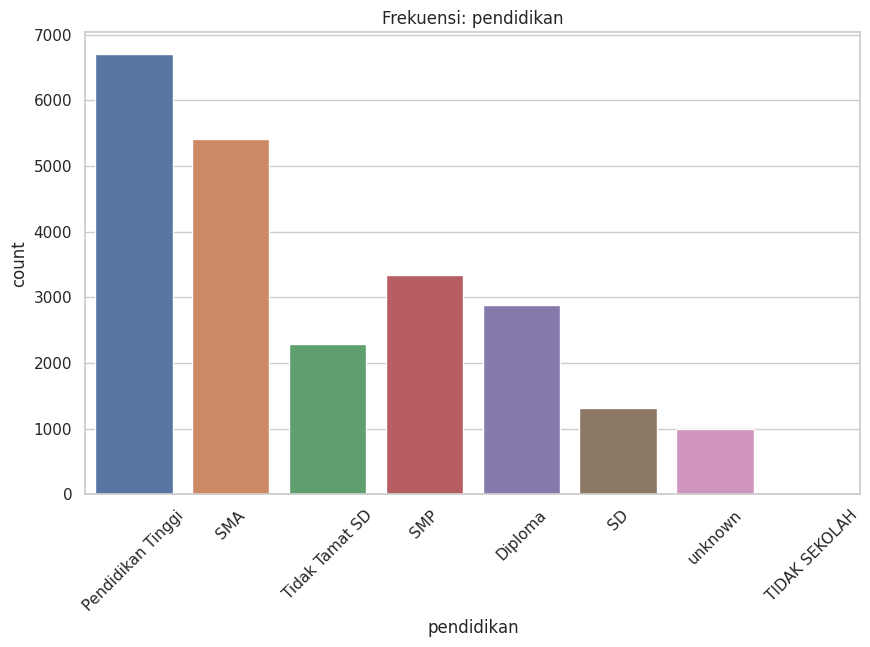

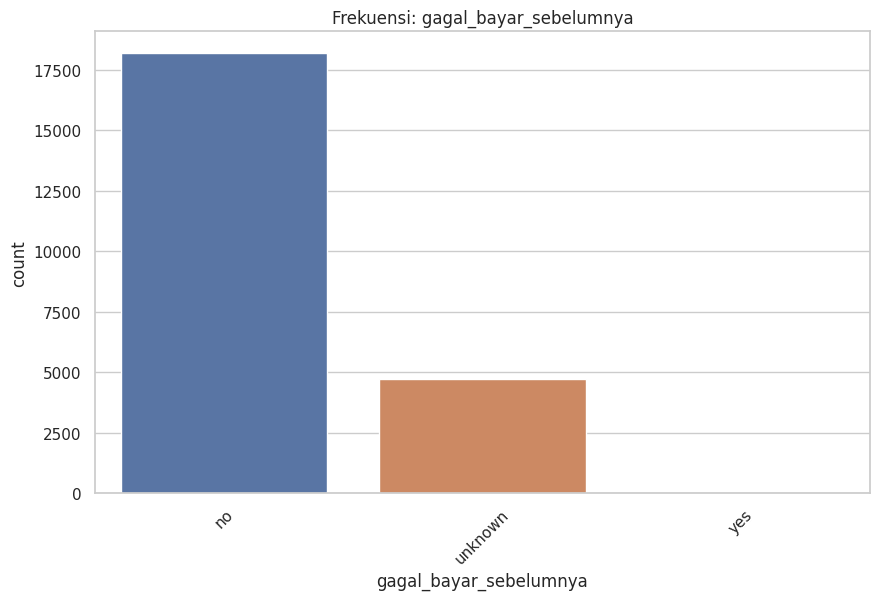

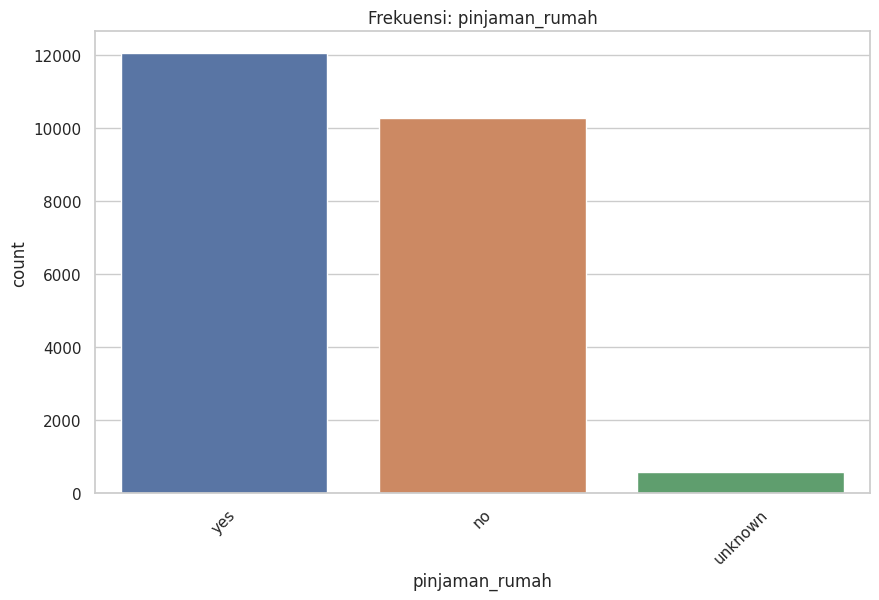

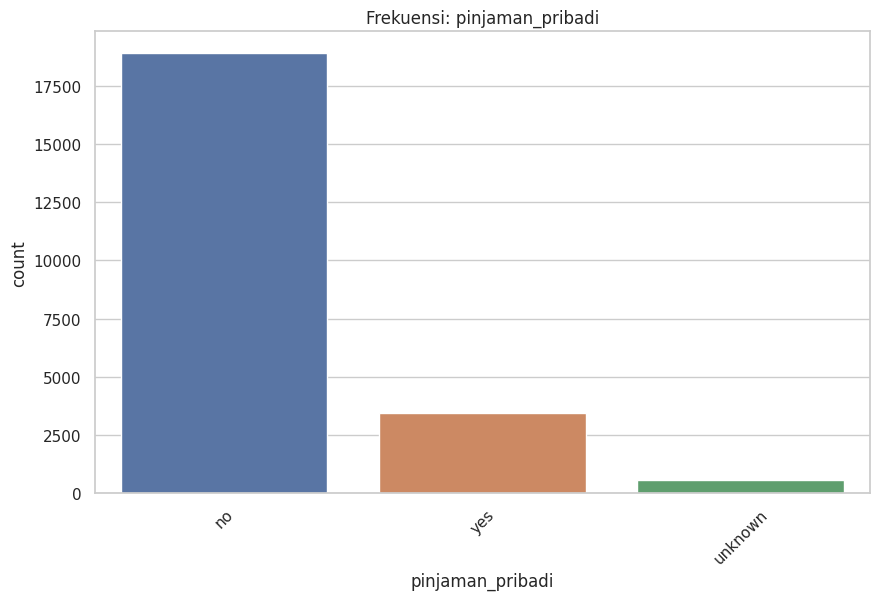

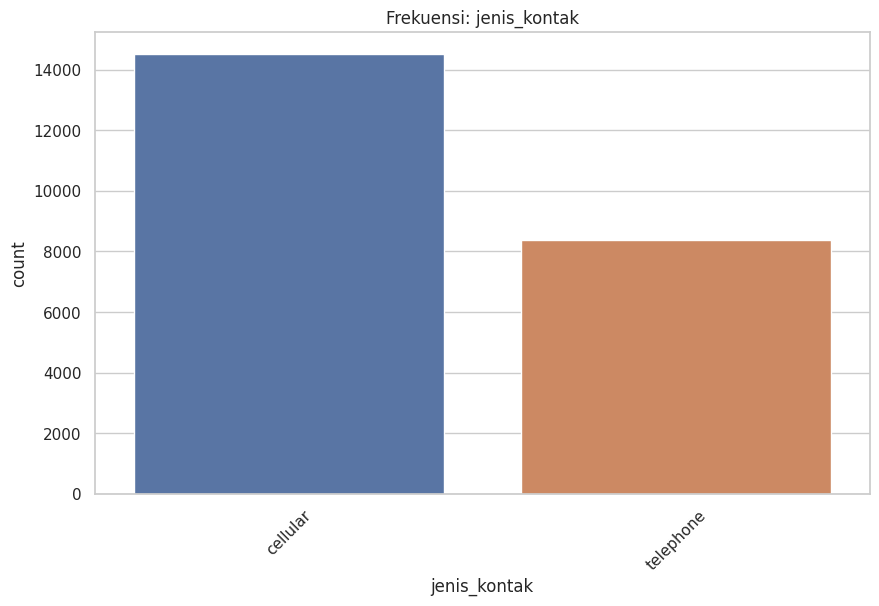

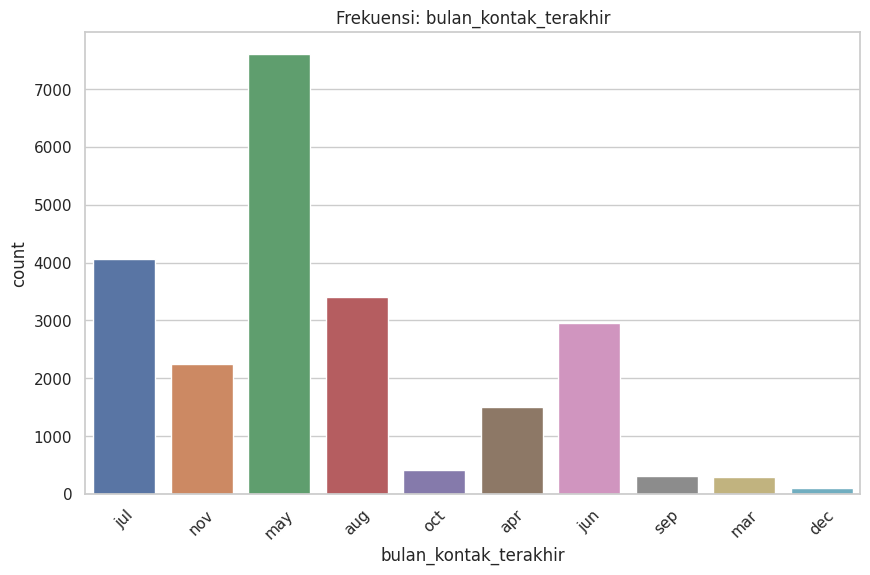

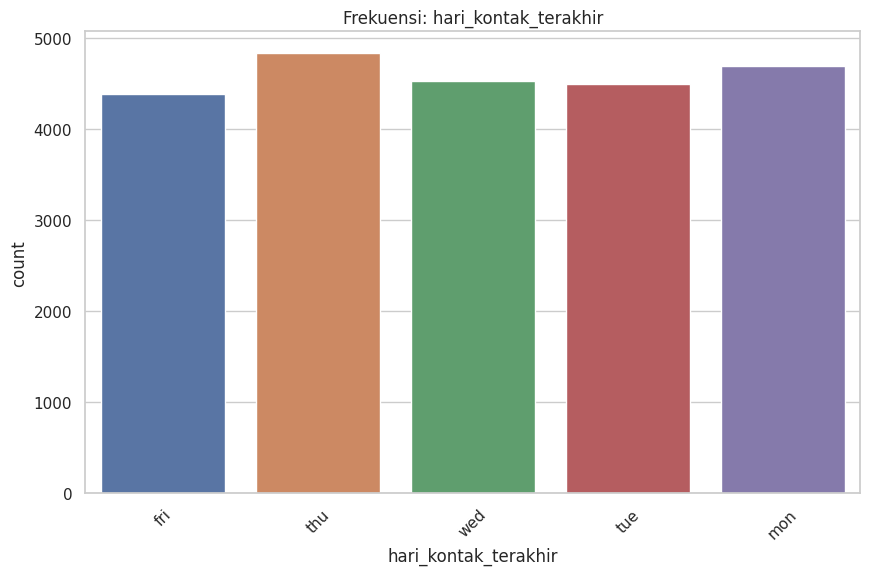

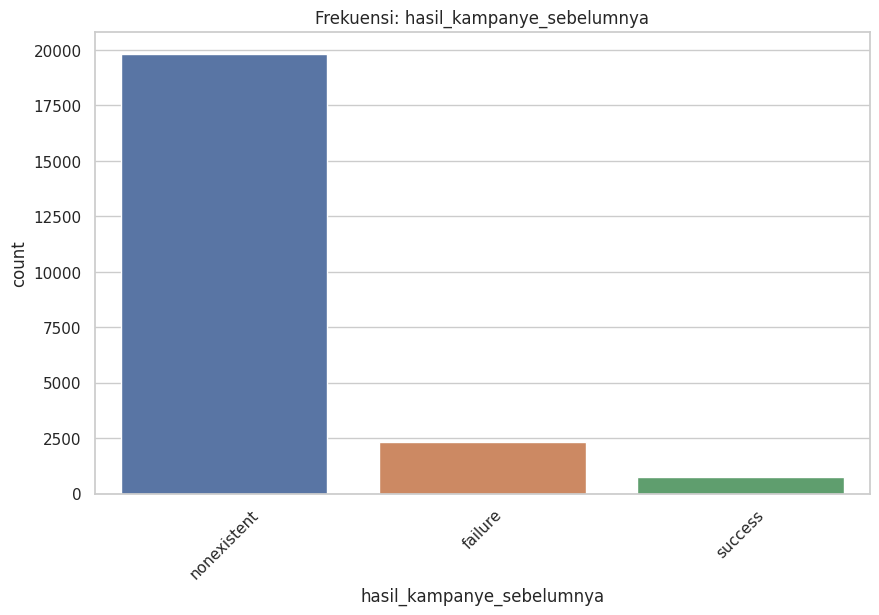

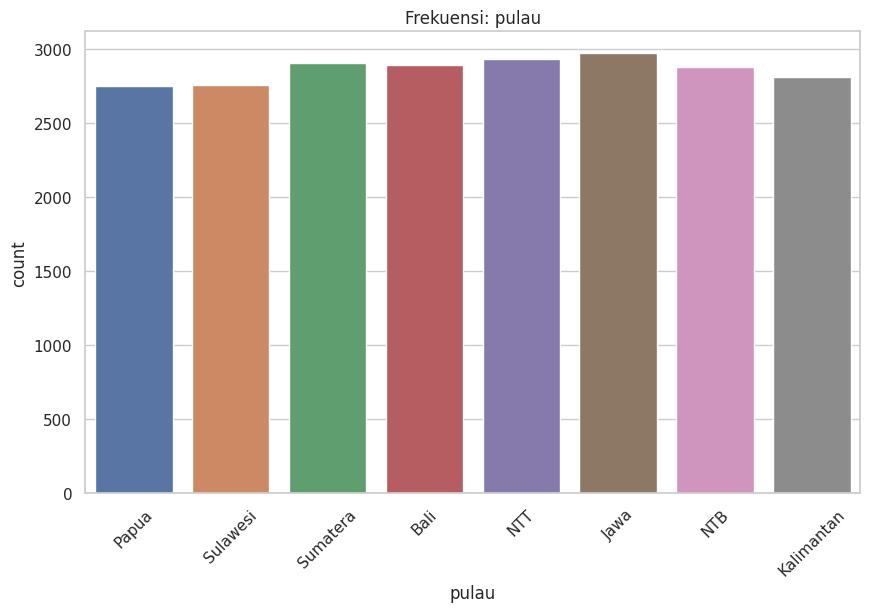

In [48]:
cat_cols = cc.select_dtypes(include="object").columns
for col in cat_cols:
    sns.countplot(x=col, data=cc)
    plt.title(f'Frekuensi: {col}')
    plt.xticks(rotation=45)
    plt.show()

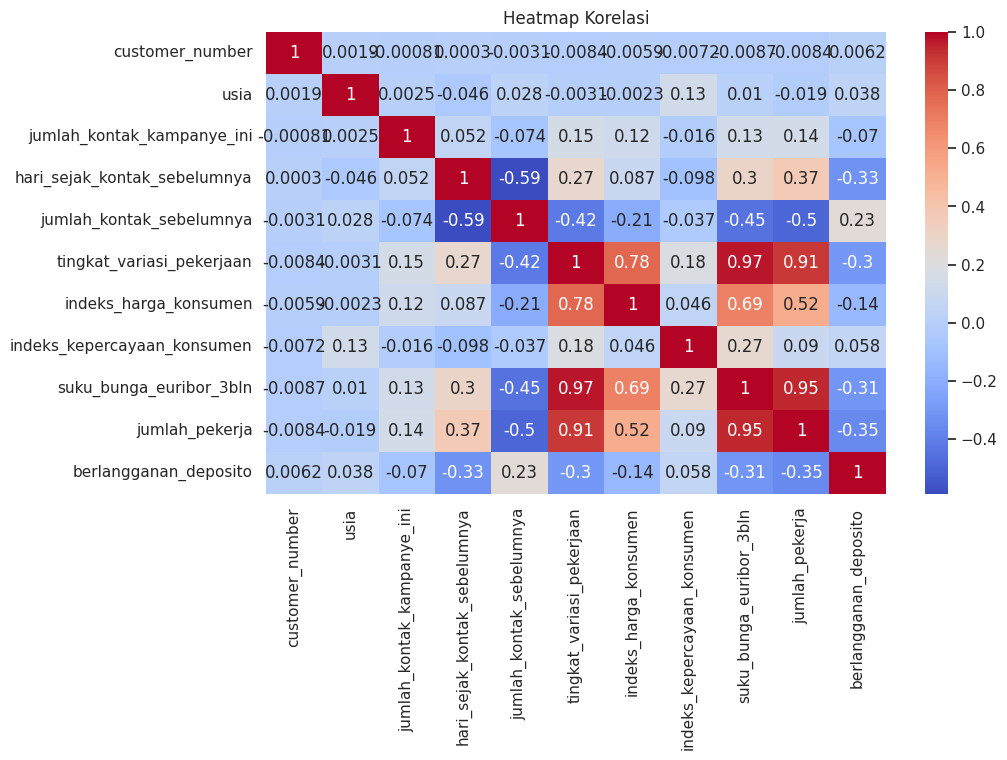

In [49]:
corr = cc.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

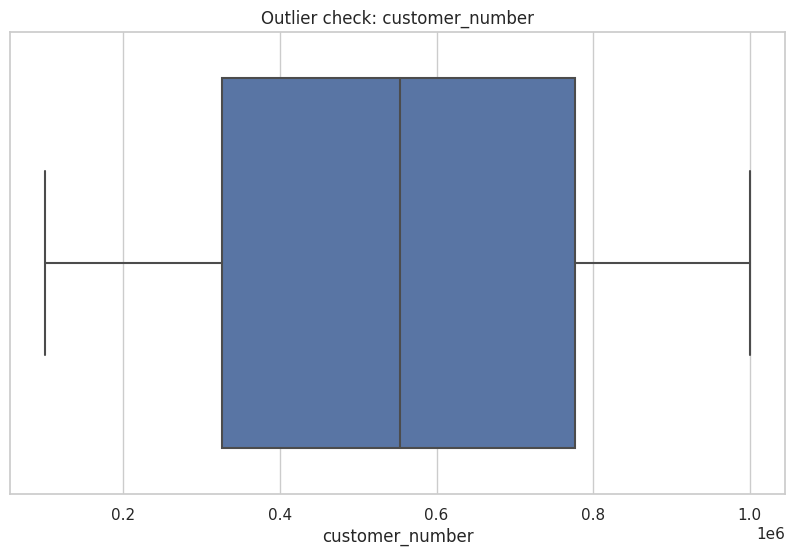

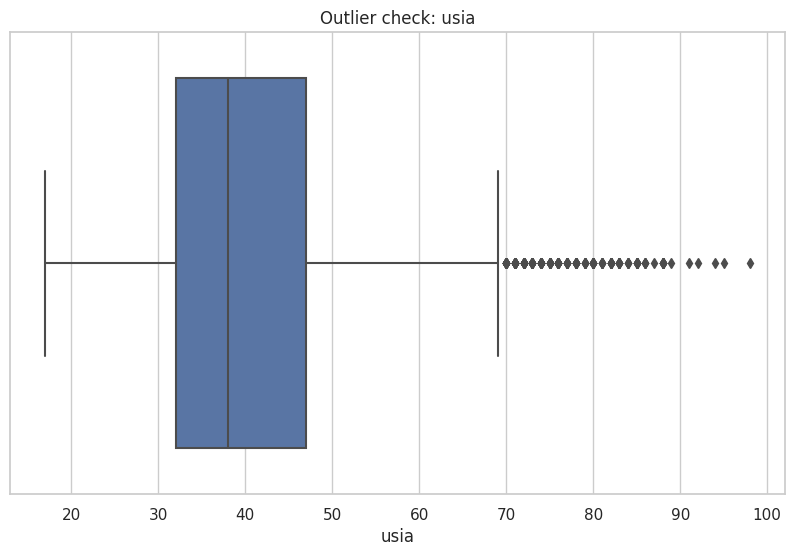

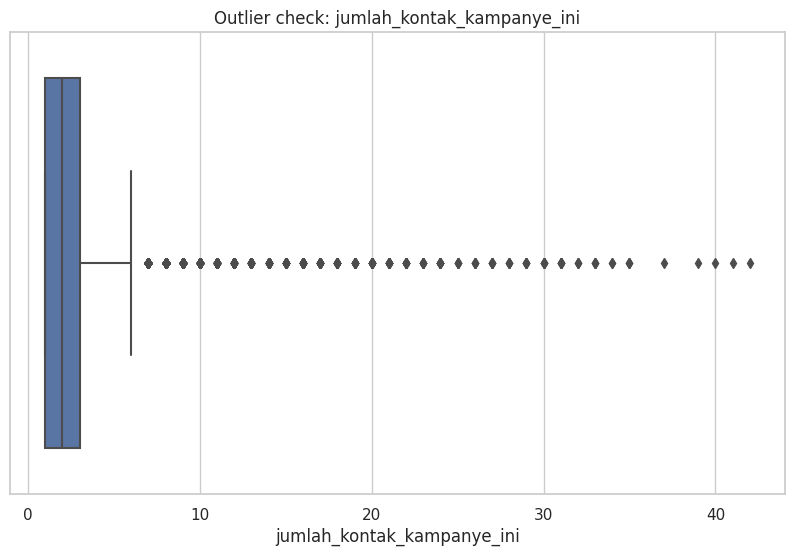

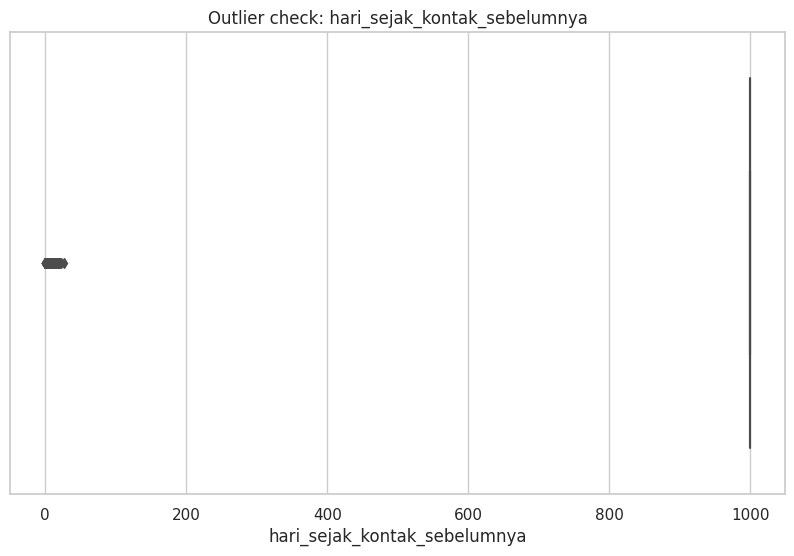

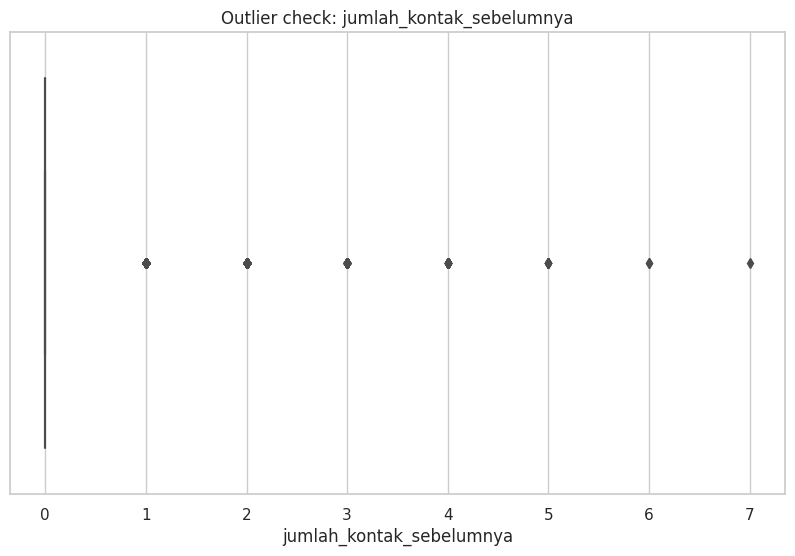

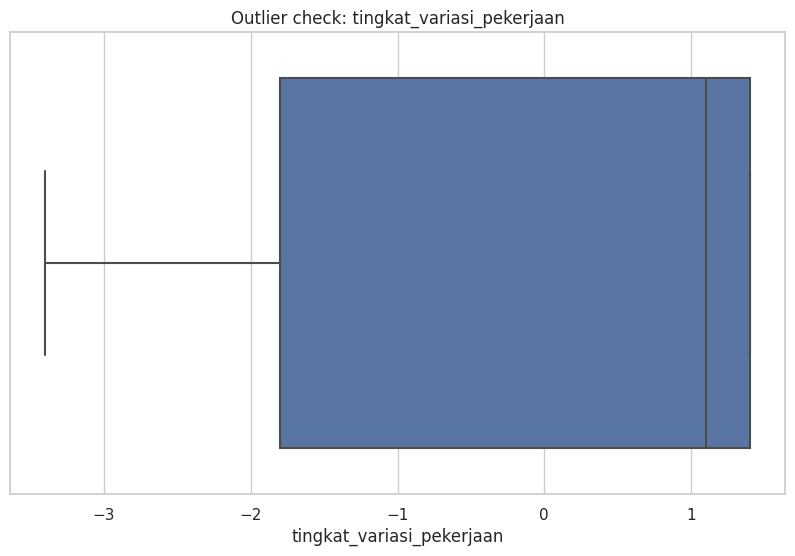

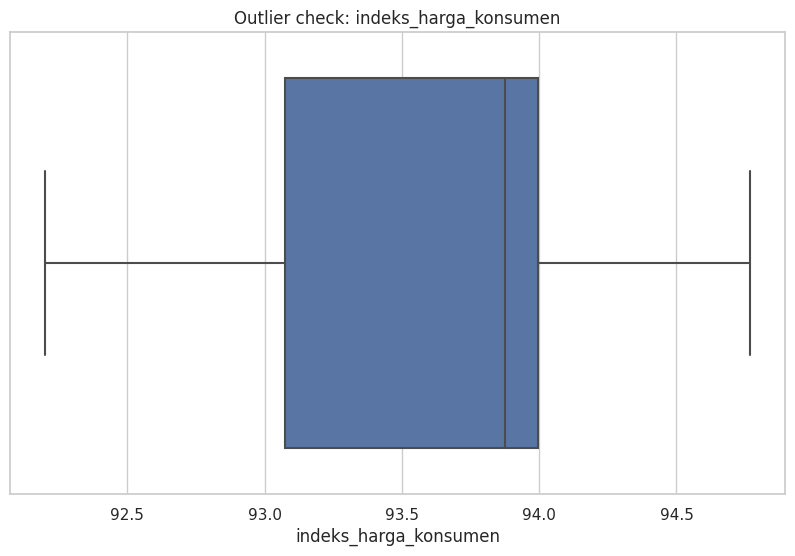

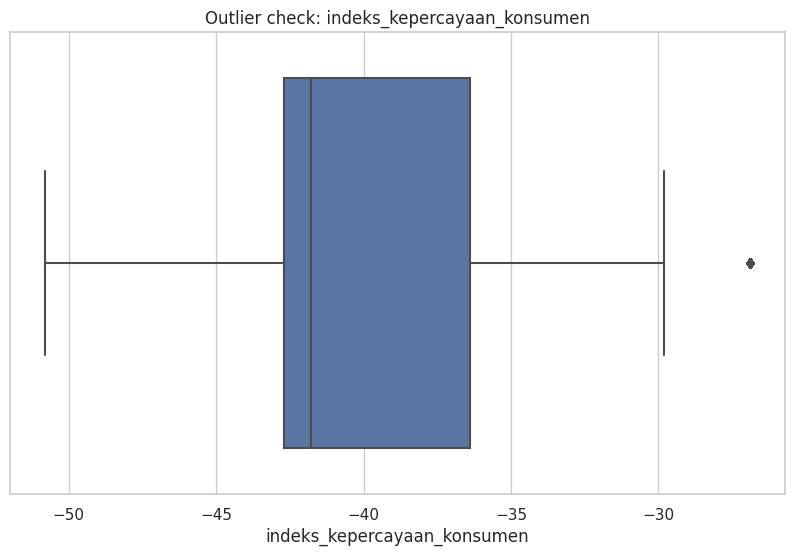

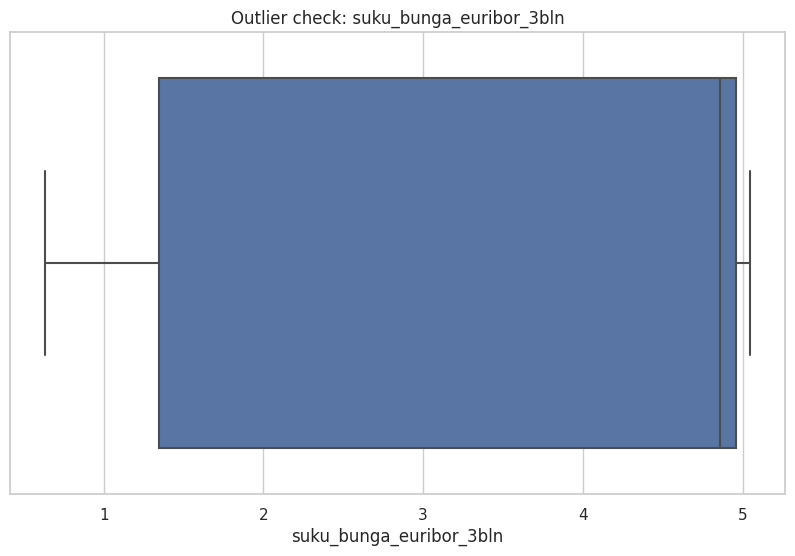

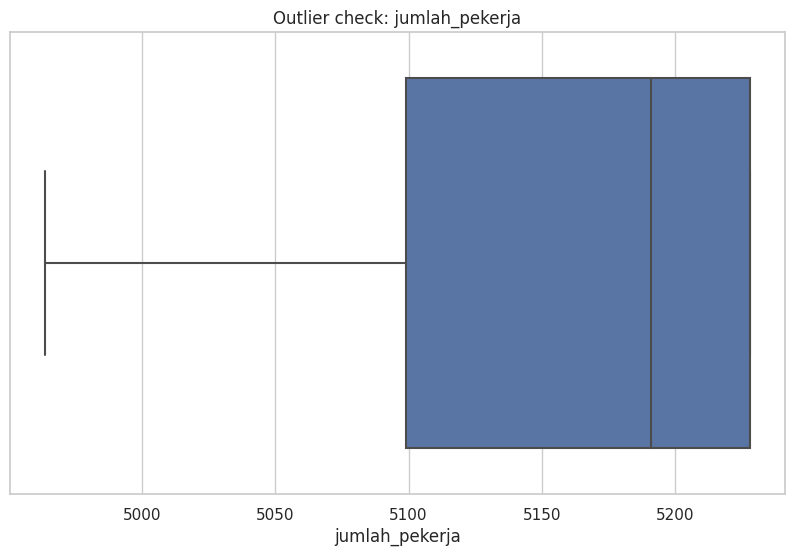

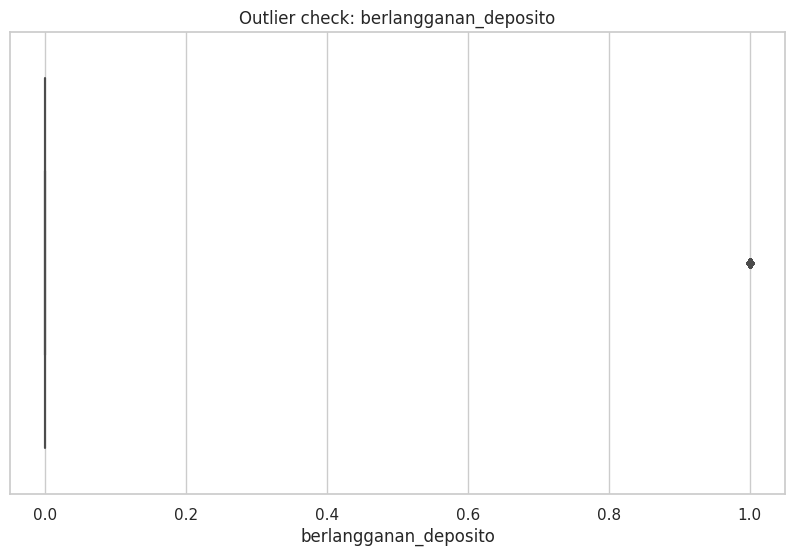

In [50]:
for col in num_cols:
    sns.boxplot(x=cc[col])
    plt.title(f'Outlier check: {col}')
    plt.show()

In [51]:
# if 'age' in df.columns and 'income' in df.columns:
#     sns.scatterplot(x='age', y='income', data=df)
#     plt.title('Hubungan Umur vs Penghasilan')
#     plt.show()

In [52]:
# if 'churn' in df.columns:
#     sns.countplot(x='churn', data=df)
#     plt.title("Distribusi Target (churn)")
#     plt.show()

# Feature Enginering

In [96]:
cc = cc.drop(columns=['berlangganan_deposito'], axis=1)
costumer_id = cc['customer_number']
#########################################
cc_validation = cc_validation.drop(columns=['berlangganan_deposito'], axis=1)
costumer_idval = cc_validation['customer_number']

KeyError: 'customer_number'

In [54]:
cc['pendidikan'] = cc['pendidikan'].replace('unknown', 'Pendidikan_Unknown')
#################################################
cc_validation['pendidikan'] = cc_validation['pendidikan'].replace('unknown', 'Pendidikan_Unknown')

In [55]:
cc['pendidikan'] = cc['pendidikan'].map({'TIDAK SEKOLAH': 0, 
        'Tidak Tamat SD': 1, 
        'SD': 2, 
        'SMP': 3, 
        'SMA': 4, 
        'Diploma': 5, 
        'Pendidikan Tinggi': 6, 
        'Pendidikan_Unknown': -1})
cc['pendidikan'].value_counts()
##########################################
cc_validation['pendidikan'] = cc_validation['pendidikan'].map({'TIDAK SEKOLAH': 0, 
        'Tidak Tamat SD': 1, 
        'SD': 2, 
        'SMP': 3, 
        'SMA': 4, 
        'Diploma': 5, 
        'Pendidikan Tinggi': 6, 
        'Pendidikan_Unknown': -1})

In [56]:
cc['hari_sejak_kontak_sebelumnya'].unique()

array([999,  14,   3,   4,   8,   7,  16,   6,  13,   1,  17,  12,  11,
        10,   9,  15,   5,   2,   0,  20,  18,  26,  19,  21,  22])

In [57]:
cc['pernah_dibubungi'] = np.where(
    (cc['hari_sejak_kontak_sebelumnya'] == 999), 0, 1
)########################
cc_validation['pernah_dibubungi'] = np.where(
    (cc_validation['hari_sejak_kontak_sebelumnya'] == 999), 0, 1
)

In [58]:
cc['hari_sejak_kontak_sebelumnya'] = cc['hari_sejak_kontak_sebelumnya'].replace(999, 0)
cc_validation['hari_sejak_kontak_sebelumnya'] = cc_validation['hari_sejak_kontak_sebelumnya'].replace(999, 0)


In [59]:
cc['RasioPekerjaSukuBunga'] = cc['jumlah_pekerja']/cc['suku_bunga_euribor_3bln']
###################################################
cc_validation['RasioPekerjaSukuBunga'] = cc_validation['jumlah_pekerja']/cc_validation['suku_bunga_euribor_3bln']

In [60]:
cc['bulan_kontak_terakhir'].unique()
cc['bulan_kontak_terakhir'] = cc['bulan_kontak_terakhir'].map({
    'jul': 7, 'nov': 11, 'may': 5, 'aug': 8, 'oct': 10, 'apr': 4, 'jun': 6, 'sep': 9, 'mar': 3, 'dec':12
}).astype(int)
cc['bulan_kontak_terakhir'].unique()
#####################################################################
cc_validation['bulan_kontak_terakhir'] = cc_validation['bulan_kontak_terakhir'].map({
    'jul': 7, 'nov': 11, 'may': 5, 'aug': 8, 'oct': 10, 'apr': 4, 'jun': 6, 'sep': 9, 'mar': 3, 'dec':12
}).astype(int)

In [61]:
cc['hari_kontak_terakhir'].unique()
cc['hari_kontak_terakhir'] = cc['hari_kontak_terakhir'].map({
    'fri': 4, 'thu': 3, 'wed': 2, 'tue': 1, 'mon': 1})
cc['hari_kontak_terakhir'].unique()
##############################################################
cc_validation['hari_kontak_terakhir'] = cc_validation['hari_kontak_terakhir'].map({
    'fri': 4, 'thu': 3, 'wed': 2, 'tue': 1, 'mon': 1})

In [62]:
cc['hasil_kampanye_sebelumnya'].unique()
cc['hasil_kampanye_sebelumnya'] = cc['hasil_kampanye_sebelumnya'].map({
    'nonexistent': 0, 'failure': 1, 'success': 2
})
###################################################################
cc_validation['hasil_kampanye_sebelumnya'] = cc_validation['hasil_kampanye_sebelumnya'].map({
    'nonexistent': 0, 'failure': 1, 'success': 2
})

In [63]:
cc['berlangganan_deposito'] = cc['berlangganan_deposito'].astype(float)
cc.select_dtypes(include='object').info()

category_columns = cc.select_dtypes(include='object').columns

for col in category_columns:
    cc[col] = cc[col].astype('category').cat.codes
###############################
cc_validation.select_dtypes(include='object').info()

category_columns = cc_validation.select_dtypes(include='object').columns

for col in category_columns:
    cc_validation[col] = cc_validation[col].astype('category').cat.codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   pekerjaan               22916 non-null  object
 1   status_perkawinan       22916 non-null  object
 2   gagal_bayar_sebelumnya  22916 non-null  object
 3   pinjaman_rumah          22916 non-null  object
 4   pinjaman_pribadi        22916 non-null  object
 5   jenis_kontak            22916 non-null  object
 6   pulau                   22916 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   pekerjaan               5729 non-null   object
 1   status_perkawinan       5729 non-null   object
 2   gagal_bayar_sebelumnya  5729 non-null   object
 3   pinjaman_ruma

In [64]:
cc['total_kontak'] = cc['jumlah_kontak_kampanye_ini'] + cc['jumlah_kontak_sebelumnya']
###################################
cc_validation['total_kontak'] = cc_validation['jumlah_kontak_kampanye_ini'] + cc_validation['jumlah_kontak_sebelumnya']

In [65]:
cc['rasio_ekonomi'] = cc['suku_bunga_euribor_3bln']/cc['indeks_harga_konsumen']
####################################
cc_validation['rasio_ekonomi'] = cc_validation['suku_bunga_euribor_3bln']/cc_validation['indeks_harga_konsumen']

In [66]:
cc['variasi_pekerjaan_terhadap_suku_bunga'] = cc['tingkat_variasi_pekerjaan']/cc['suku_bunga_euribor_3bln']
#########################################################
cc_validation['variasipekerjaanterhadapsukubunga'] = cc_validation['tingkat_variasi_pekerjaan']/cc_validation['suku_bunga_euribor_3bln']


In [67]:
cc.duplicated().sum()
cc.drop_duplicates(inplace=True)

In [68]:
cc['rasio_jumlah_pekerja_variasi_pekerjaan'] = cc['jumlah_pekerja']/cc['tingkat_variasi_pekerjaan']
##############################################################
cc_validation['rasio_jumlah_pekerja_variasi_pekerjaan'] = cc_validation['jumlah_pekerja']/cc_validation['tingkat_variasi_pekerjaan']

In [69]:
# cc['rasio_kampanye_sebelumnya_jumlah_kontak_sebelumnya'] = 

In [70]:
# cc.drop(columns=['usia'])
# cc_validation.drop(columns=['usia'])

<Axes: >

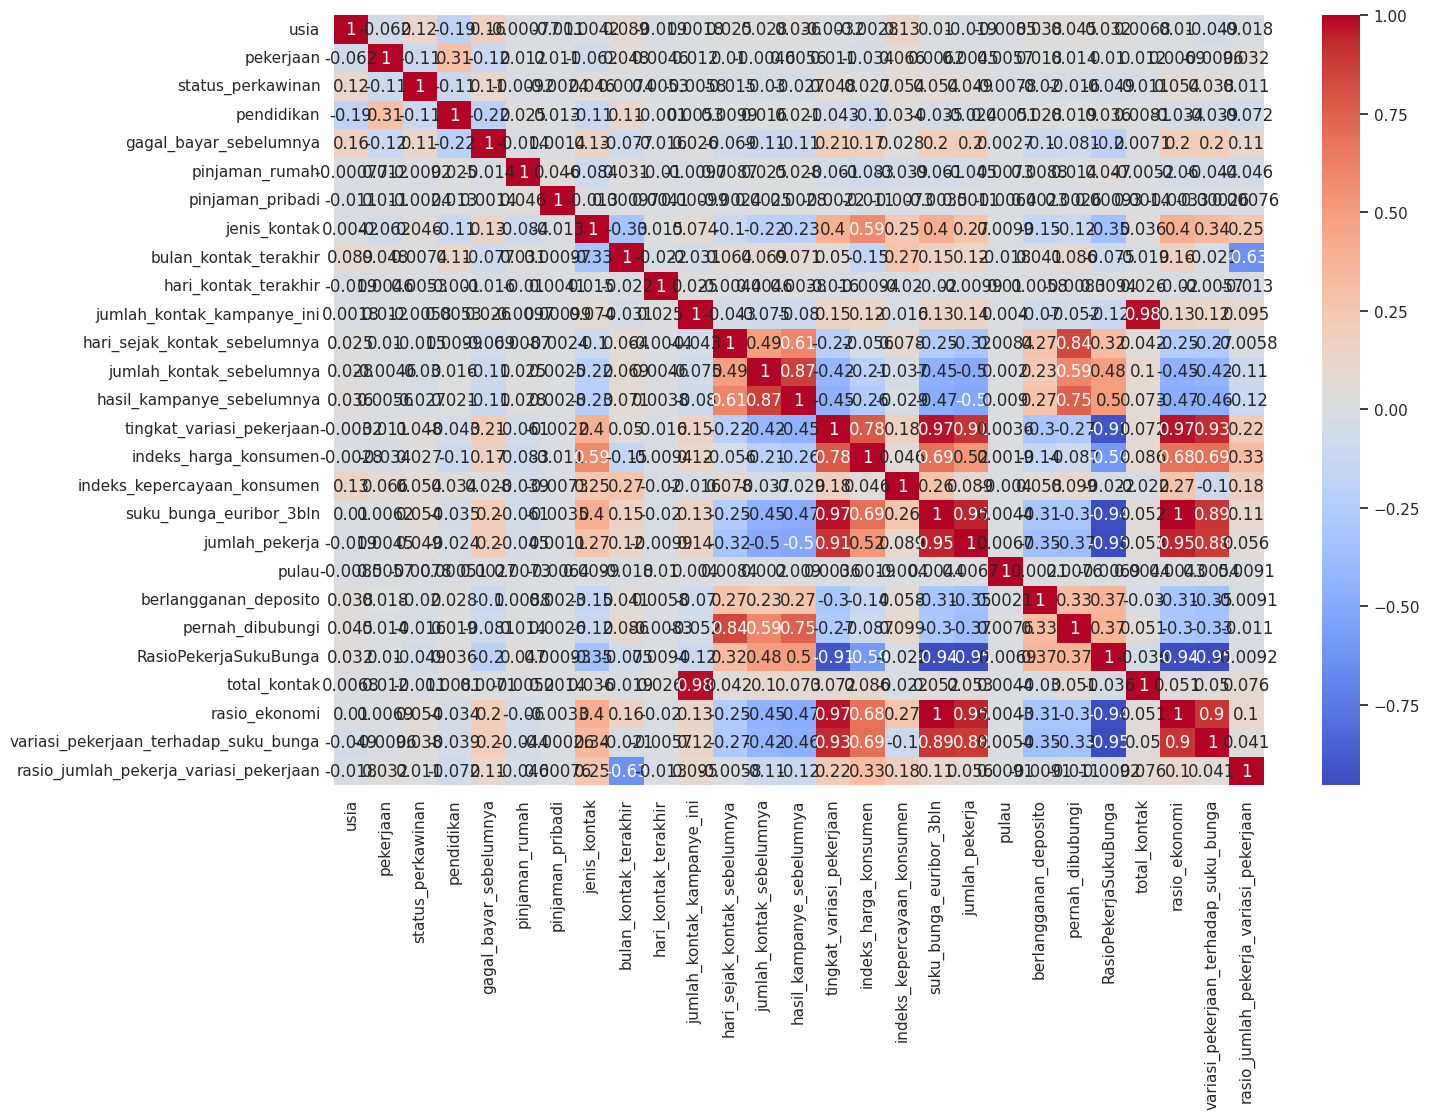

In [71]:
cc_num = cc.select_dtypes(include=np.number)
corelation_matrix = cc_num.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corelation_matrix, annot=True ,cmap='coolwarm') 

In [72]:
cc_validation.dtypes


usia                                        int64
pekerjaan                                    int8
status_perkawinan                            int8
pendidikan                                  int64
gagal_bayar_sebelumnya                       int8
pinjaman_rumah                               int8
pinjaman_pribadi                             int8
jenis_kontak                                 int8
bulan_kontak_terakhir                       int64
hari_kontak_terakhir                        int64
jumlah_kontak_kampanye_ini                  int64
hari_sejak_kontak_sebelumnya                int64
jumlah_kontak_sebelumnya                    int64
hasil_kampanye_sebelumnya                   int64
tingkat_variasi_pekerjaan                 float64
indeks_harga_konsumen                     float64
indeks_kepercayaan_konsumen               float64
suku_bunga_euribor_3bln                   float64
jumlah_pekerja                            float64
pulau                                        int8


In [73]:
cc.dtypes


usia                                        int64
pekerjaan                                    int8
status_perkawinan                            int8
pendidikan                                  int64
gagal_bayar_sebelumnya                       int8
pinjaman_rumah                               int8
pinjaman_pribadi                             int8
jenis_kontak                                 int8
bulan_kontak_terakhir                       int64
hari_kontak_terakhir                        int64
jumlah_kontak_kampanye_ini                  int64
hari_sejak_kontak_sebelumnya                int64
jumlah_kontak_sebelumnya                    int64
hasil_kampanye_sebelumnya                   int64
tingkat_variasi_pekerjaan                 float64
indeks_harga_konsumen                     float64
indeks_kepercayaan_konsumen               float64
suku_bunga_euribor_3bln                   float64
jumlah_pekerja                            float64
pulau                                        int8


In [74]:
cc.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 22831 entries, 0 to 22915
Empty DataFrame


In [75]:
# cc[cc.select_dtypes(include='boolean').columns] = cc.select_dtypes(include='boolean').astype(float)

In [76]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22831 entries, 0 to 22915
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   usia                                    22831 non-null  int64  
 1   pekerjaan                               22831 non-null  int8   
 2   status_perkawinan                       22831 non-null  int8   
 3   pendidikan                              22831 non-null  int64  
 4   gagal_bayar_sebelumnya                  22831 non-null  int8   
 5   pinjaman_rumah                          22831 non-null  int8   
 6   pinjaman_pribadi                        22831 non-null  int8   
 7   jenis_kontak                            22831 non-null  int8   
 8   bulan_kontak_terakhir                   22831 non-null  int64  
 9   hari_kontak_terakhir                    22831 non-null  int64  
 10  jumlah_kontak_kampanye_ini              22831 non-null  int64  

# Modeling

In [77]:
from cuml.ensemble import RandomForestClassifier
from cuml.preprocessing import StandardScaler
from cuml.model_selection import train_test_split
from cuml.metrics import accuracy_score, roc_auc_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import plot_importance
import optuna
import cudf
import cupy as cp
import sqlite3

In [78]:
storage_url = "sqlite:////kaggle/working/optuna_study3.db"

In [79]:
# cc = cudf.DataFrame(cc)

In [80]:
X_train = cc.drop(columns=['berlangganan_deposito'], axis=1)
y_train = cc['berlangganan_deposito']
X_val = cc_validation

count_negative = y_train.value_counts()[0]
count_positive = y_train.value_counts()[1]
scale_pos_weight = count_negative/count_positive

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

def objective(trial):
    param = {
        'device':'cuda',     
        'predictor':'gpu_predictor',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'booster': 'gbtree',
        'enable_categorical': True,
        'scale_pos_weight': scale_pos_weight,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 1.0, log=True),
        'random_state': 42
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    cv_results = xgb.cv(
        params=param,
        dtrain=dtrain,
        num_boost_round=1000, 
        nfold=5,
        stratified=True,
        metrics={'auc'}, 
        early_stopping_rounds=35,
        seed=42,
        verbose_eval=False 
    )
    best_auc = cv_results['test-auc-mean'].max()
    optimal_boost_rounds = cv_results['test-auc-mean'].idxmax() + 1
    trial.set_user_attr('optimal_boost_rounds', optimal_boost_rounds)
    return best_auc
    

study = optuna.create_study(direction='maximize', study_name='XGboost_Study1',storage=storage_url, load_if_exists=True)
study.optimize(objective, n_trials = 5000)

best_params = study.best_params
print("best parameter found from CV", best_params)

optimal_n_estimators = study.best_trial.user_attrs.get('optimal_boost_rounds', 500)
print(f"Optimal number of estimators from best trial's CV: {optimal_n_estimators}")

final_model_params = best_params.copy()
final_model_params['device'] = 'cuda'
final_model_params['predictor'] = 'gpu_predictor'
final_model_params['objective'] = 'binary:logistic' 
final_model_params['eval_metric'] = 'auc'           
final_model_params['scale_pos_weight'] = scale_pos_weight


best_model = xgb.XGBClassifier(**final_model_params, n_estimators=optimal_n_estimators, use_label_encoder=False)
best_model.fit(X_train, y_train,verbose=False)

y_pred = best_model.predict_proba(X_val)
print(y_pred[:10]) 

[I 2025-05-25 05:29:58,751] Using an existing study with name 'XGboost_Study1' instead of creating a new one.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:30:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "enable_categorical", "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-25 05:30:02,834] Trial 3000 finished with value: 0.7970488463670051 and parameters: {'learning_rate': 0.044673294681884704, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.06485496825286502, 'subsample': 0.7501950811783817, 'colsample_bytree': 0.8636019587500438, 'reg_alpha': 0.00010785268726758785, 'reg_lambda': 0.0004110636716931578}. Best is trial 2840 with value: 0.7985890277743625.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [05:30:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "enable_categorical", "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-25 05:30:04,994] Trial 3

best parameter found from CV {'learning_rate': 0.021935682985995856, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 0.008090607192197287, 'subsample': 0.9720962571506084, 'colsample_bytree': 0.798885380942558, 'reg_alpha': 0.00013453211358949022, 'reg_lambda': 0.00010121305780405658}
Optimal number of estimators from best trial's CV: 255


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [06:19:02] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


NameError: name 'y_pred_proba' is not defined

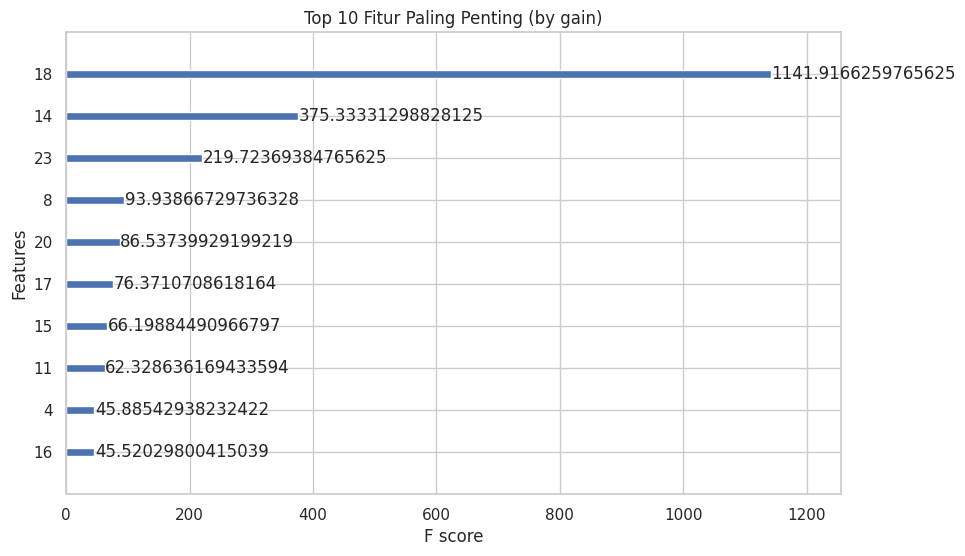

In [81]:
plot_importance(best_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Fitur Paling Penting (by gain)")
plt.show()

In [95]:
print(y_pred)
print(costumer_ids1)
submission = cudf.DataFrame({'customer_number': customer_ids1 ,'berlangganan_deposito': y_pred[:,1]})
submission.to_csv("DCM_DMU_2025_Model_Batok_kelapa.csv", index=False)

[[0.66974413 0.3302559 ]
 [0.7594626  0.24053742]
 [0.8076279  0.19237208]
 ...
 [0.8345468  0.16545317]
 [0.78642243 0.21357758]
 [0.77583456 0.22416544]]


NameError: name 'costumer_ids1' is not defined